In [1]:
import os
print(os.getcwd())
os.chdir('/Users/mabbate/Desktop/Python_Projects/CS733/Final_Project/final')
print(os.getcwd())

/Users/mabbate/Desktop/Python_Projects/CS733/Final_Project/final
/Users/mabbate/Desktop/Python_Projects/CS733/Final_Project/final


In [2]:
from pitcher_fct import plotPitch
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score, plot_roc_curve
from numpy.random import seed
from sklearn.tree import plot_tree
import time
from datetime import datetime
from mlb_final_v2 import evaluate

In [3]:
 # Preprocess the data
baseball_orig = pd.read_csv('mlb_cleaned_updated_PLOC.csv')
b_nan = sum(baseball_orig.isnull().sum(axis = 0))
baseball_orig.dropna(inplace=True)
print("The total number of rows is:", len(baseball_orig))
print("The number of rows due to NaN dropped:", b_nan, '\n')
print('Initial Value Counts:')
print(baseball_orig.event.value_counts(), '\n')


# Separate majority and minority classes
df_majority = baseball_orig[baseball_orig.event == 1]
df_minority = baseball_orig[baseball_orig.event == 0]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples= baseball_orig['event'].sum(),    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
baseball = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
print('New Value Counts After Resampling:')
print(baseball.event.value_counts(), '\n')

The total number of rows is: 736325
The number of rows due to NaN dropped: 11723 

Initial Value Counts:
1    496796
0    239529
Name: event, dtype: int64 

New Value Counts After Resampling:
1    496796
0    496796
Name: event, dtype: int64 



In [4]:
X_orig = baseball.iloc[:, 7:-1]
for col in X_orig:
    if X_orig[str(col)].max() !=1:
        col = str(col)
        X_orig[col] = (X_orig[col] - X_orig[col].min()) / (X_orig[col].max() - X_orig[col].min())

X = X_orig
# 1 is out, 0 is on-base
y = baseball.iloc[:, -1:]
# y.loc[y['event'] == 0] = 'on-base'
# y.loc[y['event'] == 1] = 'out'


X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state = 100)

print("The shape of X_train: ", X_train.shape)
print("The shape of y_train: ", y_train.shape)
print("The shape of X_test: ", X_test.shape)
print("The shape of y_test: ", y_test.shape)

The shape of X_train:  (695514, 31)
The shape of y_train:  (695514,)
The shape of X_test:  (298078, 31)
The shape of y_test:  (298078,)


In [ ]:
print("Random Forest: ------------------------------------------------")
    # Create the RF Classifier
rf_classifier = RandomForestClassifier(criterion = 'gini', random_state = 100,    #max_features='sqrt',
                                       bootstrap=False, class_weight='balanced',
                                       n_estimators=245 )#, max_depth=6, max_leaf_nodes=20)  # 245
# Fit the training data
rf_classifier.fit(X_train, y_train)
print('Fitted!')

In [ ]:
# Predict at-bat outcomes using X_test
y_pred = rf_classifier.predict(X_test)
# Evaluate the predictions
evaluate(y_test, y_pred)
# Get probabilities for each class
rf_probs = rf_classifier.predict_proba(X_test)[:, 1]
X_test['probs'] = rf_probs
print(X_test[['px','probs']])

In [6]:
# Plot the locations of the first three pitches from the original dataset
baseball_orig[['px','pz']].head(3)

,px,pz
0,0.627,2.397
1,-0.257,2.047
2,-0.286,1.830


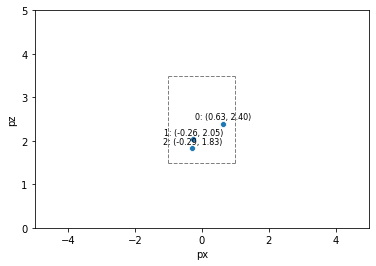

In [7]:
px = baseball_orig['px'].head(3)
pz = baseball_orig['pz'].head(3)
plotPitch(px,pz)